In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import palettable.colorbrewer.sequential as pal
from tqdm import tqdm
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=False)



In [111]:
np.array([1,2,3]).T

array([1, 2, 3])

In [109]:
np.linalg.inv(Jx)

array([[-10. ,  -0. ],
       [ -0. ,  -0.2]])

In [118]:
def sherman_morrison_inv(Jx,g,s):
    return np.linalg.inv(Jx) -(np.linalg.inv(Jx)@(np.outer(g,s)@np.linalg.inv(Jx)))/(1+ np.dot(s,np.linalg.inv(Jx)@g))

In [119]:
s = np.random.random(2)
s = s/np.linalg.norm(s)
g = np.random.random(2)
g = g/np.linalg.norm(g)
np.linalg.inv(Jx - np.outer(g, s))

array([[-1.4611682 ,  0.12657113],
       [ 0.13636533, -0.19797866]])

In [120]:
sherman_morrison_inv(Jx,g,s)

array([[ 1.72949006,  0.17386627],
       [ 0.18732021, -0.19722335]])

In [69]:
def dx_norm(theta,phi,alpha, Jx):
    dF = np.array([np.cos(alpha),np.sin(alpha)])
    g = np.array([np.cos(phi),np.sin(phi)])
    s = np.array([np.cos(theta),np.sin(theta)])
    return np.linalg.norm(np.matmul(np.linalg.inv(Jx + np.outer(g, s)), dF))**2

In [125]:
Jx

array([[-1.e-03,  0.e+00],
       [ 0.e+00, -5.e+00]])

In [3]:
def avg_dx_norm(theta,phi,Jx,sigma,alphas):
    return np.mean([dx_norm(theta,phi,alpha, Jx) for alpha in alphas])

In [23]:
Jx = np.array([[-5,0],[0,-5]])
fn = lambda x : dx_norm(x[0],x[1], np.pi/4, Jx)
sp.optimize.minimize(fn,np.array([.1,.1]),bounds = [(0,2*np.pi),(0,2*np.pi)])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.027777778030039228
        x: [ 7.856e-01  7.853e-01]
      nit: 5
      jac: [ 1.837e-06 -8.788e-07]
     nfev: 21
     njev: 7
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [54]:
np.linspace(0,2*np.pi,100)

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 15491.04it/s]


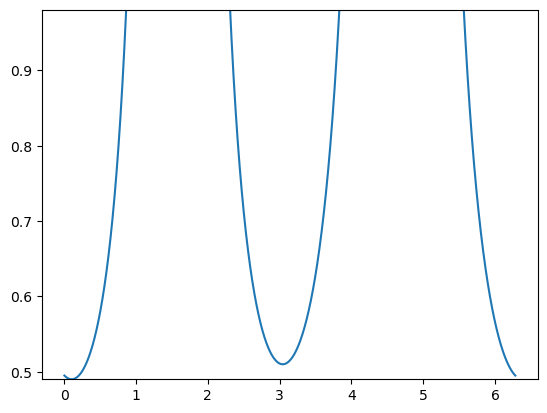

In [71]:
#print(Jx)
Jx = np.array([[-10/1000,0],[0,-10]])

results = []
thetas = np.linspace(0,2*np.pi,10000)
for theta in tqdm(thetas):
    results.append(dx_norm(theta,np.pi,np.pi/4, Jx))
    
plt.plot(thetas,results)
plt.ylim([np.min(results),2*np.min(results)])
plt.show()


In [56]:
results

[0.5195003747501563,
 0.5088741979983021,
 0.5022519298889813,
 0.4995713920314744,
 0.5008991676247304,
 0.5064405556129464,
 0.5165604253444535,
 0.531818154893517,
 0.5530221272844608,
 0.5813128813205224,
 0.6182900462727875,
 0.6662086635398385,
 0.7282894095718091,
 0.8092228040319432,
 0.9160174822842386,
 1.0594876400516777,
 1.2569938701746861,
 1.5378056906432869,
 1.954396807470183,
 2.6085558961201367,
 3.7195304347262814,
 5.833973738187068,
 10.651751456604394,
 25.91396272515252,
 138.51445005002185,
 1355.3894652584595,
 51.70113437097044,
 16.012415647595255,
 7.767752390707277,
 4.625624410003944,
 3.103645051122565,
 2.253690186986059,
 1.7320968137942583,
 1.3899181433409875,
 1.1541143697376954,
 0.9854647102019449,
 0.8613903674196992,
 0.7681591727667678,
 0.697042298737733,
 0.6422890225463279,
 0.5999996283565955,
 0.5674690093491728,
 0.5427896125758348,
 0.5246035981212984,
 0.5119442225431217,
 0.5041325174091499,
 0.5007094725081702,
 0.5013919144864271,
 0

In [47]:
mode_gaps = np.logspace(-4,0,100)
sigmas = np.array([0.1, .25,.75,1])
sdots_sigma = []
sdots_sigma_alpha = []
gdots_sigma = []
gdots_sigma_alpha = []
alpha_0 = np.pi/4
for i in sigmas:
    alphas = sp.stats.truncnorm.rvs(-np.pi/i,np.pi/i,loc=0, scale=i, size=1000 ) + alpha_0 
    thetas = []
    phis = []
    sdots = []
    gdots = []
    sdots_alpha = []
    gdots_alpha = []
    for j in tqdm(mode_gaps):
        Jx = np.array([[-5*j,0],[0,-5]])
        x = lambda vars : avg_dx_norm(vars[0],vars[1], Jx,i ,alphas)
        results = sp.optimize.minimize(x,np.array([0,.0]),bounds = [(0,2*np.pi),(0,2*np.pi)]).x
        thetas.append(results[0])
        phis.append(results[1])
        sdots.append(np.dot(np.array([np.cos(results[0]),np.sin(results[0])]),np.array([1,0])))
        gdots.append(np.dot(np.array([np.cos(results[1]),np.sin(results[1])]),np.array([1,0])))
        sdots_alpha.append(np.dot(np.array([np.cos(results[0]),np.sin(results[0])]),np.array([np.cos(alpha_0 ),np.sin(alpha_0 )])))
        gdots_alpha.append(np.dot(np.array([np.cos(results[1]),np.sin(results[1])]),np.array([np.cos(alpha_0 ),np.sin(alpha_0 )])))
    sdots_sigma.append(sdots)
    gdots_sigma.append(gdots)
    sdots_sigma_alpha.append(sdots_alpha)
    gdots_sigma_alpha.append(gdots_alpha)

100%|█████████████████████████████████████████| 100/100 [01:19<00:00,  1.26it/s]


In [10]:
Jx = np.array([[-5/10000,0],[0,-5]])
i = 0.01
alphas = sp.stats.truncnorm.rvs(-np.pi/i,np.pi/i,loc=0, scale=i, size=1000 ) + alpha_0 
alphas = np.zeros(1000)+alpha_0
x = lambda vars : dx_norm(vars[0],vars[1],alpha_0, Jx)
results = sp.optimize.minimize(x,np.array([.1,.1]),bounds = [(0,2*np.pi),(0,2*np.pi)]).x

NameError: name 'alpha_0' is not defined

In [171]:
results

array([2.01453947e-01, 1.96227091e-05])

In [147]:
avg_dx_norm(results[0],results[1], Jx,i ,np.array([alpha_0]))

0.6741478612022233

In [149]:
dx_norm(0,0, alpha_0,Jx)

0.6881240725545249

(0.0, 100.0)

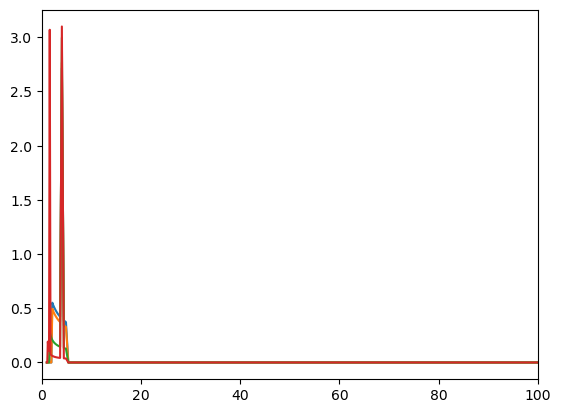

In [14]:
for i in range(len(sigmas)):
    plt.plot(1/mode_gaps,np.arccos(sdots_sigma[i]))
plt.xlim([0,100])

In [35]:
mode_gaps = np.logspace(-2,0,100)
sigmas = np.array([0.1, .25,.75,1])
sdots_sigma = []
sdots_sigma_alpha = []
gdots_sigma = []
gdots_sigma_alpha = []
alpha_0 = np.pi/4
for i in sigmas:
    alphas = sp.stats.truncnorm.rvs(-np.pi/i,np.pi/i,loc=0, scale=i, size=1000 ) + alpha_0 
    thetas = []
    phis = []
    sdots = []
    gdots = []
    sdots_alpha = []
    gdots_alpha = []
    for j in tqdm(mode_gaps):
        Jx = np.array([[-5*j,0],[0,-5]])
        x = lambda vars : avg_dx_norm(vars[0],vars[1], Jx,i ,alphas)
        results = sp.optimize.minimize(x,np.array([.1,.1]),bounds = [(0,2*np.pi),(0,2*np.pi)]).x
        thetas.append(results[0])
        phis.append(results[1])
        sdots.append(np.dot(np.array([np.cos(results[0]),np.sin(results[0])]),np.array([1,0])))
        gdots.append(np.dot(np.array([np.cos(results[1]),np.sin(results[1])]),np.array([1,0])))
        sdots_alpha.append(np.dot(np.array([np.cos(results[0]),np.sin(results[0])]),np.array([np.cos(alpha_0 ),np.sin(alpha_0 )])))
        gdots_alpha.append(np.dot(np.array([np.cos(results[1]),np.sin(results[1])]),np.array([np.cos(alpha_0 ),np.sin(alpha_0 )])))
    sdots_sigma.append(sdots)
    gdots_sigma.append(gdots)
    sdots_sigma_alpha.append(sdots_alpha)
    gdots_sigma_alpha.append(gdots_alpha)

  3%|▉                              | 3/100 [00:02<01:20,  1.20it/s]


KeyboardInterrupt: 

In [28]:
[pal.Oranges_4.mpl_colors[i] for i in range(len(sigmas))]

[(0.996078431372549, 0.9294117647058824, 0.8705882352941177),
 (0.9921568627450981, 0.7450980392156863, 0.5215686274509804),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.8509803921568627, 0.2784313725490196, 0.00392156862745098)]

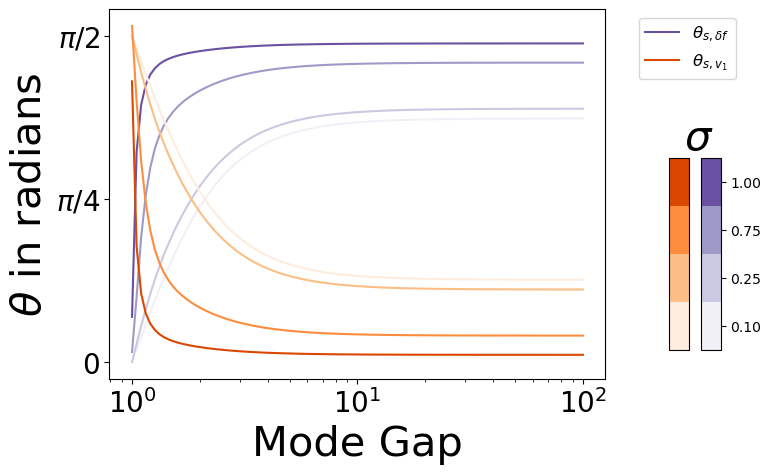

In [48]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = False
colors = [pal.Purples_4.mpl_colors[i] for i in range(len(sigmas))]
colors2 = [pal.Oranges_4.mpl_colors[i] for i in range(len(sigmas))]

cmap = ListedColormap(colors)

mode_gaps = np.logspace(-2,0,100)
labels =['_nolegend_','_nolegend_','_nolegend_',r'$\theta_{s,\delta f}$']
for i in range(len(sigmas)):
    plt.plot(1/mode_gaps,np.arccos(np.abs(sdots_sigma_alpha[i])),color=colors[i], label = labels[i])
labels =['_nolegend_','_nolegend_','_nolegend_',r'$\theta_{s,v_1}$']
for i in range(len(sigmas)):
    plt.plot(1/mode_gaps,np.arccos(np.abs(sdots_sigma[i])),color=colors2[i], label = labels[i])

plt.ylabel(r'$\theta$ in radians', fontsize=30)
plt.xlabel('Mode Gap', fontsize=30)

plt.xscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1),fontsize='large')
plt.yticks([0,np.pi/8,np.pi/4],["$0$",r"$\pi/4$",r"$\pi/2$"])

xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()
# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(20)  # Adjust the font size as desired
norm = plt.Normalize(-100,100)
cbar_ax = plt.gcf().add_axes([1.05, 0.17, 0.03, 0.4])



cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap),cax=cbar_ax)
cbar.set_ticks([i*.25 + .125 for i in range(len(sigmas))])
cbar.set_ticklabels([f'{param:.2f}' for param in sigmas])
cbar.ax.set_title('$\sigma$   ', fontsize=30)

cmap = ListedColormap(colors2)
cbar_ax = plt.gcf().add_axes([1, 0.17, 0.03, 0.4])

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap),cax=cbar_ax)
cbar.set_ticks([])

xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(18)  # Adjust the font size as desired

plt.savefig("figga.svg")
plt.show()

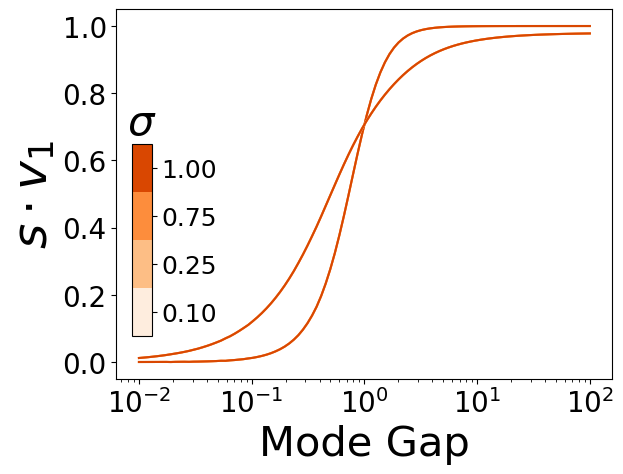

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = False
colors = [pal.Oranges_4.mpl_colors[i] for i in range(len(sigmas))]
cmap = ListedColormap(colors)

mode_gaps = np.logspace(-2,2,100)
for i in range(len(sigmas)):
    plt.plot(1/mode_gaps,np.abs(gdots_sigma[i]),color=colors[i], label = 'dot product of s and v_1, perturbation std = '+ str(sigmas[i]))
plt.ylabel('$s \cdot v_1$', fontsize=35)
plt.xlabel('Mode Gap', fontsize=30)

mode_gaps = np.logspace(-2,2,100)
for i in range(len(sigmas)):
    plt.plot(1/mode_gaps,np.abs(sdots_sigma[i]),color=colors[i], label = 'dot product of s and v_1, perturbation std = '+ str(sigmas[i]))
plt.ylabel('$s \cdot v_1$', fontsize=35)
plt.xlabel('Mode Gap', fontsize=30)

plt.xscale('log')
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()
# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(20)  # Adjust the font size as desired
norm = plt.Normalize(min(mode_gaps), max(mode_gaps))
cbar_ax = plt.gcf().add_axes([0.15, 0.2, 0.03, 0.4])



cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),cax=cbar_ax)
cbar.set_ticks([i*25 + 12.5 for i in range(len(sigmas))])
cbar.set_ticklabels([f'{param:.2f}' for param in sigmas])
cbar.ax.set_title('$\sigma$', fontsize=30)


xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(18)  # Adjust the font size as desired

plt.savefig("fig1c.svg")
plt.show()

In [ ]:
[i*.25 + 1/8 for i in range(len(sigmas))]

[0.125, 0.375, 0.625, 0.875]

In [ ]:
x(np.array([.1,.1]))

TypeError: ignored

In [104]:
sdots = []
sdot_alphas = []
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.02])

for j in mode_gaps:
  alpha = 0.4
  Jx = np.array([[-5*j,0],[0,-5]])
  thetas = []
  phis = []
  alphas = np.linspace(0,.99*np.pi/2,10000)
  for alpha in tqdm(alphas):
    x = lambda vars : dx_norm(vars[0],vars[1],alpha, Jx)

    results = sp.optimize.minimize(x,np.array([.1,.1]),bounds = [(0,2*np.pi),(0,2*np.pi)]).x
    thetas.append(results[0])
    phis.append(results[1])
  
  sdot = [np.dot(np.array([np.cos(thetas[i]),np.sin(thetas[i])]),np.array([1,0])) for i in range(len(alphas))]
  sdot_alpha = [np.dot(np.array([np.cos(thetas[i]),np.sin(thetas[i])]),np.array([np.cos(alphas[i]),np.sin(alphas[i])])) for i in range(len(alphas))]
  #gdot = [np.dot(np.array([np.cos(thetas[i]),np.sin(thetas[i])]),np.array([0,1])) for i in range(len(alphas))]
  sdots.append(sdot)
  sdot_alphas.append(sdot_alpha)
  #plt.plot(alphas,np.abs(sdot),label = 'mode gap = ' + str(j))
  #plt.plot(alphas,np.abs(gdot))


100%|████████████████████████| 10000/10000 [00:47<00:00, 208.76it/s]


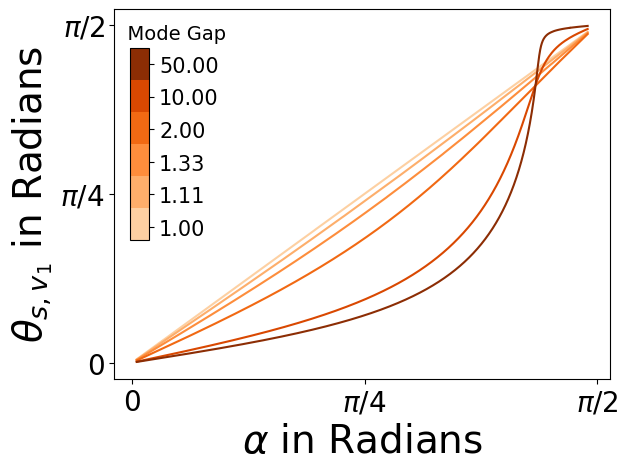

In [105]:
from matplotlib.colors import ListedColormap
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.02])

colors = [pal.Oranges_8.mpl_colors[i+2] for i in range(len(mode_gaps))]
cmap = ListedColormap(colors)

plt.rcParams['text.usetex'] = False
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.02])
for j in range(len(mode_gaps)):
      plt.plot(alphas[100:-100],np.arccos((np.abs(sdots[j])))[100:-100],color = colors[j],label = 'mode gap = ' + str(np.round(1/mode_gaps[j],2) ) )
plt.xlabel(r'$\alpha$ in Radians', fontsize=28)
plt.ylabel(r'$\theta_{s,v_1}$ in Radians', fontsize=28)
plt.xticks([0,np.pi/4,np.pi/2],["$0$",r"$\pi/4$",r"$\pi/2$"])
plt.yticks([0,np.pi/4,np.pi/2],["$0$",r"$\pi/4$",r"$\pi/2$"])

xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(20)  # Adjust the font size as desired
norm = plt.Normalize(min(mode_gaps), max(mode_gaps))
cbar_ax = plt.gcf().add_axes([0.15, 0.40, 0.03, 0.4])



cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),cax=cbar_ax)
cbar.set_ticks([1/6*(i) + 1/12 for i in range(len(mode_gaps))])
cbar.set_ticklabels([f'{param:.2f}' for param in 1/mode_gaps])


cbar.ax.set_title('            Mode Gap', fontsize = 14)
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(15)  # Adjust the font size as desired

#plt.legend()
plt.savefig("fig1b.svg")
plt.show()

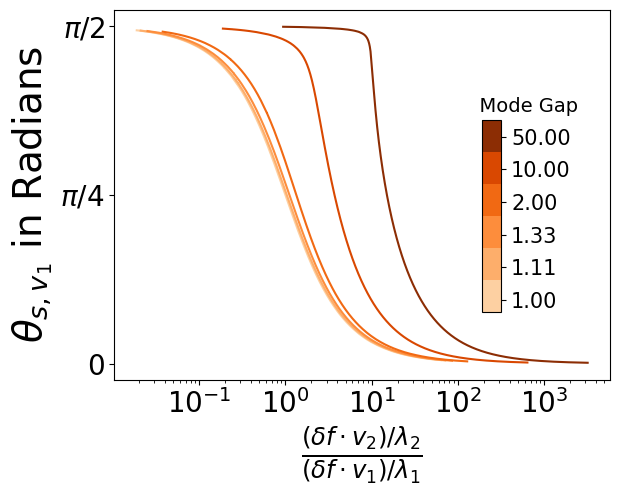

In [106]:
from matplotlib.colors import ListedColormap
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.02])

colors = [pal.Oranges_8.mpl_colors[i+2] for i in range(len(mode_gaps))]
cmap = ListedColormap(colors)
bounds = (100,-20)
plt.rcParams['text.usetex'] = False
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.02])
for j in range(len(mode_gaps)):
      plt.plot((np.cos(alphas[bounds[0]:bounds[1]])/mode_gaps[j])/np.sin(alphas[bounds[0]:bounds[1]]),np.arccos((np.abs(sdots[j][bounds[0]:bounds[1]]))),color = colors[j],label = 'mode gap = ' + str(np.round(1/mode_gaps[j],2) ) )
plt.xlabel(r'$\frac{(\delta f \cdot v_2) / \lambda_2}{(\delta f \cdot v_1) / \lambda_1}$', fontsize=25)
plt.ylabel(r'$\theta_{s,v_1}$ in Radians', fontsize=28)
plt.yticks([0,np.pi/4,np.pi/2],["$0$",r"$\pi/4$",r"$\pi/2$"])

xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()
plt.xscale('log')
# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(20)  # Adjust the font size as desired
norm = plt.Normalize(min(mode_gaps), max(mode_gaps))
cbar_ax = plt.gcf().add_axes([0.70, 0.25, 0.03, 0.4])



cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),cax=cbar_ax)
cbar.set_ticks([1/6*(i) + 1/12 for i in range(len(mode_gaps))])
cbar.set_ticklabels([f'{param:.2f}' for param in 1/mode_gaps])


cbar.ax.set_title('            Mode Gap', fontsize = 14)
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(15)  # Adjust the font size as desired

#plt.legend()
plt.savefig("fig1b.svg")
plt.show()

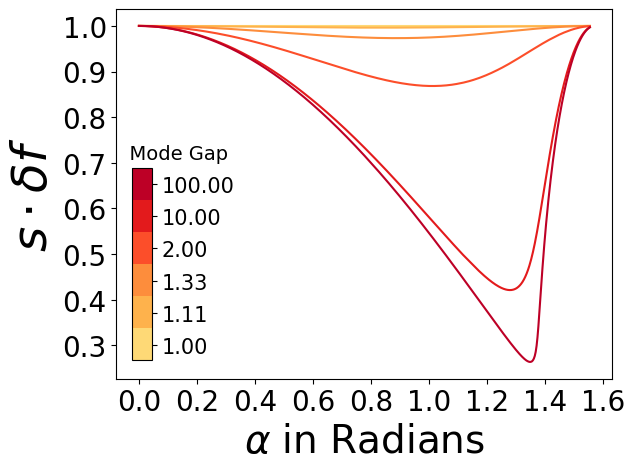

In [63]:
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.02])

colors = [pal.YlOrRd_9.mpl_colors[i+2] for i in range(len(mode_gaps))]
cmap = ListedColormap(colors)

plt.rcParams['text.usetex'] = False
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.01])
for j in range(len(mode_gaps)):
  plt.plot(alphas,np.abs(sdot_alphas[j]),color = colors[j], label = 'mode gap = ' + str(np.round(1/mode_gaps[j],2) ))
plt.xlabel(r'$\alpha$ in Radians', fontsize=28)
plt.ylabel('$s\cdot \delta f$', fontsize=35 )
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(20)  # Adjust the font size as desired
norm = plt.Normalize(min(mode_gaps), max(mode_gaps))
cbar_ax = plt.gcf().add_axes([0.15, 0.15, 0.03, 0.4])



cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),cax=cbar_ax)
cbar.set_ticks([1/6*(i) + 1/12 for i in range(len(mode_gaps))])
cbar.set_ticklabels([f'{param:.2f}' for param in 1/mode_gaps])


cbar.ax.set_title('            Mode Gap', fontsize = 14)
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(15)  # Adjust the font size as desired
plt.savefig("fig1a.svg")
plt.show()

In [ ]:
alphas = np.linspace(0,np.pi,1000)
#sdot = [np.dot(np.array([np.cos(phis[i]),np.sin(phis[i])]),np.array([np.cos(alphas[i]),np.sin(alphas[i])])) for i in range(len(alphas))]
#gdot = [np.dot(np.array([np.cos(thetas[i]),np.sin(thetas[i])]),np.array([np.cos(alphas[i]),np.sin(alphas[i])])) for i in range(len(alphas))]
sdot = [np.dot(np.array([np.cos(phis[i]),np.sin(phis[i])]),np.array([0,1])) for i in range(len(alphas))]
gdot = [np.dot(np.array([np.cos(thetas[i]),np.sin(thetas[i])]),np.array([0,1])) for i in range(len(alphas))]



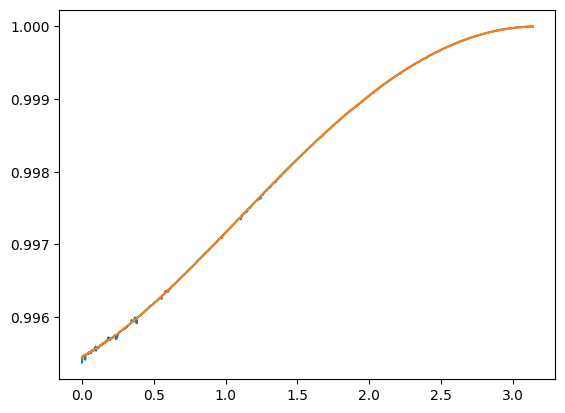

In [ ]:
plt.plot(alphas,np.abs(sdot))
plt.plot(alphas,np.abs(gdot))

In [ ]:
for k in tqdm(range(len(theta))):
  dx = np.zeros((len(alpha),len(phi)))
  for i in range(len(alpha)):
    for j in range(len(phi)):
      dF = np.array([np.cos(theta[k]),np.sin(theta[k])])
      g = np.array([np.cos(phi[j]),np.sin(phi[j])])
      s = np.array([np.cos(alpha[i]),np.sin(alpha[i])])
      dx[i,j] = np.linalg.norm(np.matmul(np.linalg.inv(Jx - np.outer(g, s)), dF))
  alpha_min = alpha[np.argwhere(dx == np.min(dx))[0][0]]
  phi_min = phi[np.argwhere(dx == np.min(dx))[0][1]]
  g_min  = np.array([np.cos(phi_min),np.sin(phi_min)])
  s_min = np.array([np.cos(alpha_min),np.sin(alpha_min)])
  gdot[k] = np.dot(g_min,dF)
  sdot[k] = np.dot(s_min,dF)
  opt_alpha[k] = alpha[np.argwhere(dx == np.min(dx))[0][0]]
  opt_phi[k] = phi[np.argwhere(dx == np.min(dx))[0][1]]


100%|██████████| 100/100 [01:15<00:00,  1.33it/s]


In [ ]:
j = 1
i = 1
k = 1
dF = np.array([np.cos(theta[k]),np.sin(theta[k])])
g = np.array([np.cos(phi[j]),np.sin(phi[j])])
s = np.array([np.cos(alpha[i]),np.sin(alpha[i])])

In [ ]:
np.linalg.norm(np.matmul(np.linalg.inv(Jx - np.outer(g, s)), dF))

0.33333113569402684

In [ ]:
np.argwhere(Jx == np.min(Jx))[0][1]

1

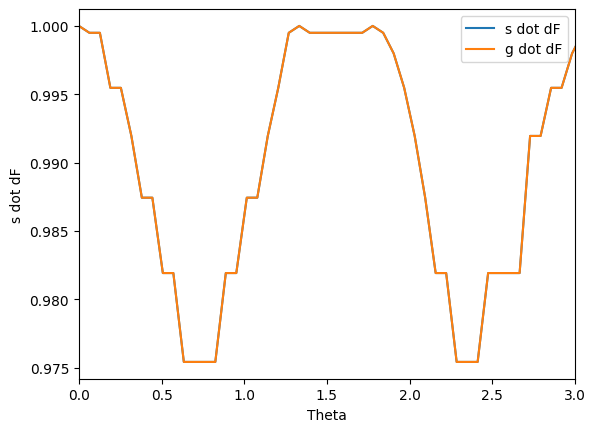

In [ ]:

plt.plot(theta,np.abs(sdot),label = 's dot dF')
plt.plot(theta,np.abs(sdot),label = 'g dot dF')
#plt.plot(theta,[np.dot(np.array([np.cos(t),np.sin(t)]),[1,0]) for t in theta ])
plt.ylabel('s dot dF')
plt.xlim([0,3])
plt.xlabel('Theta')
plt.legend()

In [ ]:
opt_phi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 3.14159265,
       0.19039955, 0.53946541, 0.856798  , 1.11066407, 1.36453014,
       1.65012947, 1.90399555, 2.15786162, 2.44346095, 2.76079354,
       3.10985939, 3.14159265, 3.14159265, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 3.14159265, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03173326,
       0.38079911, 0.6981317 , 0.98373103, 1.23759711, 1.49146